<h1><b>Ο αλγόριθμος Πολυωνυμικής Παλινδρόμησης (Polynomial Regression)</b></h1>

<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>πολυωνυμικής παλινδρόμησης</i></b> (<b><i>polynomial regression</i></b>). Για την εκπαίδευση του μοντέλου θα χρησιμοποιήσετε τα δεδομένα του αρχείου <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab1/data2.csv">data2.csv</a></b></i>. Η εφαρμογή αφορά την εκτίμηση των τιμών της πίεσης (pressure) ενός συστήματος δεδομένης της θερμοκρασίας (temperature).</p>

<p align="justify">Στο Notebook αυτό περιλαμβάνονται εντολές για (α) τη φόρτωση των δεδομένων εκπαίδευσης που περιέχονται στο αρχείο <b><i>data2.csv</b></i>, (β) την εκπαίδευση ενός μοντέλου <b><i>linear regression</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης, (γ) την εκπαίδευση ενός μοντέλου <b><i>polynomial regression</i></b> βαθμού <b><i>degree</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης και (δ) την οπτικοποίηση των δεδομένων εκπαίδευσης, καθώς και των γραμμών απόφασης για τα δύο μοντέλα παλινδρόμησης. Για την εκπαίδευση των δύο μοντέλων παλινδρόμησης χρησιμοποιείται η βιβλιοθήκη <b><i>Scikit-Learn</b></i> της <b><i>Python</i></b>. Περισσότερες πληροφορίες για τον αλγόριθμο <b><i>polynomial regression</i></b> και τον κώδικα της άσκησης μπορούν να βρεθούν <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">εδώ</a>.</p>

<p align="justify">Στην άσκηση αυτή, καλείστε να παρατηρήσετε τη μορφή και τις αλλαγές της γραμμής παλινδρόμησης για διαφορετικές τιμές της παραμέτρου <b><i>degree</b></i> βάσει των δεδομένων εκπαίδευσης που παρέχονται.</p>

<p align="justify">Αρχικά, θα εγκαταστήσετε και θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>


In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1ab8bb766d195b0d6b2c63bd0186cc5678513263fec6435510f6f58d1000a03f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


Στη συνέχεια, θα φορτώσετε τα δεδομένα εκπαίδευσης που παρέχονται από το αρχείο
 <b><i>data2.csv</b></i>.

In [4]:
data = pd.read_csv('data2.csv')
print(data)

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           40    0.0500
9    10           45    0.0600
10   11           50    0.0700
11   12           55    0.0800
12   13           60    0.0900
13   14           65    0.1000
14   15           70    0.1100


Τώρα, θα δημιουργήσετε τις μεταβλητές εισόδου και εξόδου για τους αλγορίθμους μηχανικής μάθησης από τα δεδομένα εκπαίδευσης που παρέχονται.

In [5]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

print("Input")

print(X)

print("Labels")

print(y)

Input
[[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]
Labels
[0.0002 0.001  0.0017 0.004  0.02   0.04   0.01   0.034  0.05   0.06
 0.07   0.08   0.09   0.1    0.11  ]


Στη συνέχεια, θα εκπαιδεύσετε το μοντέλο <b><i>linear regression</i></b>, χρησιμοποιώντας τα παραπάνω δεδομένα εκπαίδευσης.

In [6]:
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

<h3><b><i>Ερώτημα 1</b></i></h3>

<p align="justify">Να εκτελέσετε τα παρακάτω τμήματα κώδικα για τις τιμές της παραμέτρου <b><i>degree</b></i> {<i>2, 3, 4, 5, 8, 10, 12, 15</i>} και να καταγράψετε τα διαγράμματα που παρέχονται ως έξοδοι. Τι αλλαγές παρατηρείτε στη μορφή της γραμμής παλινδρόμησης για το μοντέλο <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>; Τι παρατηρείτε για τον απαιτούμενο χρόνο εκπαίδευσης του μοντέλου <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>;</p>

<br>

**<h4> <b><i>degree</b></i> = 2 </h4>**

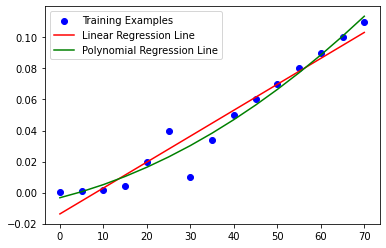

In [7]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 3 </h4>

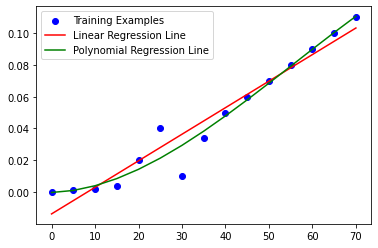

In [8]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 4 </h4>

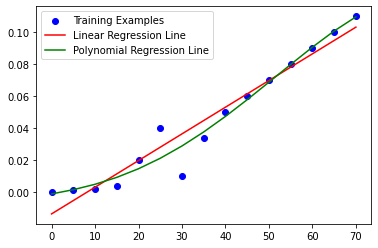

In [9]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 5 </h4>

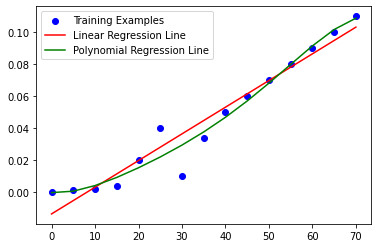

In [10]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 8 </h4>

In [ ]:
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 10 </h4>

In [ ]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 12 </h4>

In [ ]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 15 </h4>

In [ ]:
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h3><b><i>Ερώτημα 2</b></i></h3>

Σας παρέχεται, επίσης, το αρχείο <b><i>data2b.csv</i></b>, το οποίο είναι το αρχείο <b><i>data2.csv</i></b> με μία παραπάνω εγγραφή, την <b><i>(9, 38, 0.3)</i></b>. Να εκτελέσετε το παρακάτω πρόγραμμα για την τιμή της παραμέτρου <b><i>degree = 15</i></b>. Πόσο μεγάλη είναι η αλλαγή που παρατηρείτε στη μορφή της γραμμής παλινδρόμησης σε σχέση με την αντίστοιχη περίπτωση του ερωτήματος 1; Τι συμπέρασμα μπορείτε να βγάλετε για τον αλγόριθμο <b><i>polynomial regression</i></b>;

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           38    0.3000
9    10           40    0.0500
10   11           45    0.0600
11   12           50    0.0700
12   13           55    0.0800
13   14           60    0.0900
14   15           65    0.1000
15   16           70    0.1100


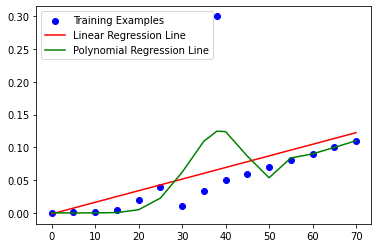

In [11]:
data = pd.read_csv('data2b.csv')
print(data)

X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

lin = LinearRegression()
lin.fit(X, y)

poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()